Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

PIMA Diabetes Dataset

In [2]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv')

In [4]:
# printing the first 5 rows of the dataset
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [6]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0 --> Non-Diabetic

1 --> Diabetic

In [8]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [11]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [12]:
classifier = svm.SVC(kernel='linear', probability=True)

In [13]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

Model Evaluation

Accuracy Score

In [14]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [15]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7833876221498371


In [16]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [17]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


Making a Predictive System

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Create a scaler object
X_train_scaled = scaler.fit_transform(X_train)  # Scale X_train
X_test_scaled = scaler.transform(X_test)  # Scale X_test using the same scaler

In [22]:
cv_scores = cross_val_score(RandomForestClassifier(), X_train_scaled, Y_train, cv=5, scoring='accuracy')
cv_scores.mean()*100

np.float64(76.70398507263761)

In [24]:
cv_scores = cross_val_score(LogisticRegression(max_iter=1000), X_train_scaled, Y_train, cv=5, scoring='accuracy')
cv_scores.mean()*100

np.float64(78.17139810742371)

In [25]:
cv_scores = cross_val_score(SVC(kernel='rbf',C=10), X_train_scaled, Y_train, cv=5, scoring='accuracy')
cv_scores.mean()*100

np.float64(74.91270158603226)

In [26]:
import xgboost as xgb

In [27]:
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # Since it's a binary classification problem
    eval_metric='logloss',  # Log loss is good for binary classification
    n_estimators=100,  # Number of trees (boosting rounds)
    learning_rate=0.1,  # Step size shrinkage
    max_depth=5,  # Maximum depth of trees
    random_state=42
)

In [29]:
cv_scores = cross_val_score(xgb_model, X_train_scaled, Y_train, cv=5, scoring='accuracy')
cv_scores.mean()*100

np.float64(75.40183926429427)

In [30]:
from sklearn.naive_bayes import GaussianNB

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
cv_scores = cross_val_score(DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42), X_train_scaled, Y_train, cv=5, scoring='accuracy')
cv_scores.mean()*100

np.float64(69.53485272557643)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Build the neural network
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))  # input layer
model.add(Dense(32, activation='relu'))  # hidden layer
model.add(Dense(1, activation='sigmoid'))  # output layer (sigmoid for binary classification)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=50, batch_size=8, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5629 - loss: 2.4992 - val_accuracy: 0.5041 - val_loss: 1.4643
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6396 - loss: 1.0021 - val_accuracy: 0.4878 - val_loss: 1.3630
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6778 - loss: 0.7957 - val_accuracy: 0.6098 - val_loss: 0.7087
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6080 - loss: 1.2299 - val_accuracy: 0.5772 - val_loss: 0.7792
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6582 - loss: 0.7063 - val_accuracy: 0.6423 - val_loss: 0.7845
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7484 - loss: 0.6177 - val_accuracy: 0.5528 - val_loss: 0.7876
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7114 - loss: 0.6597 - val_accuracy: 0.6098 - val_loss: 1.2635
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7226 - loss: 0.7385 - val_accuracy: 0.6341 - val_loss: 0.8216
Epo

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
for column in X.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age


In [ ]:
raw = loaded_model.predict_proba(input_data_reshaped)*100
prediction_proba = loaded_model.predict_proba(input_data_reshaped)[0][1] * 100
print(prediction_proba)


58.42833859203375


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
raw

array([[41.57166141, 58.42833859]])

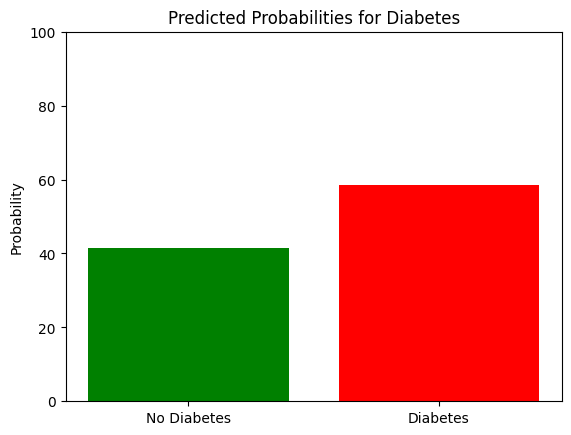

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'raw' contains your probability array:
# raw = np.array([[0.41189184, 0.58810816]])

# Extract probabilities
no_diabetes_prob = raw[0][0]
diabetes_prob = raw[0][1]

# Create bar chart
labels = ['No Diabetes', 'Diabetes']
probabilities = [no_diabetes_prob, diabetes_prob]

plt.bar(labels, probabilities, color=['green', 'red'])  # Customize colors if desired
plt.title('Predicted Probabilities for Diabetes')
plt.ylabel('Probability')
plt.ylim(0, 100)  # Set y-axis limits for better visualization
plt.show()

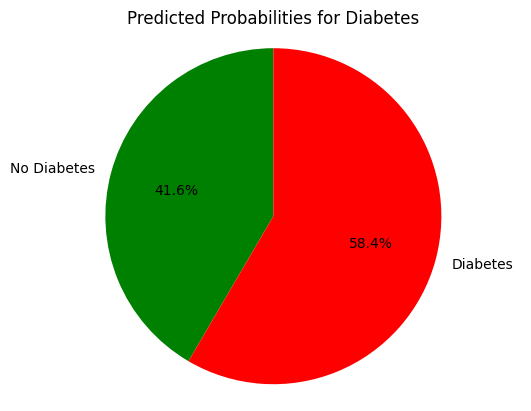

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'raw' contains your probability array:
# raw = np.array([[0.41189184, 0.58810816]])

# Extract probabilities
no_diabetes_prob = raw[0][0]
diabetes_prob = raw[0][1]

# Create pie chart
labels = ['No Diabetes', 'Diabetes']
probabilities = [no_diabetes_prob, diabetes_prob]
colors = ['green', 'red']  # Customize colors if desired

plt.pie(probabilities, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Predicted Probabilities for Diabetes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

.values =
array([[ 0.,  0., -0.,  0., -0.,  0.,  0.,  0.]])

.base_values =
array([0.34061525])

.data =
array([[  5.   , 166.   ,  72.   ,  19.   , 175.   ,  25.8  ,   0.587,
         51.   ]])


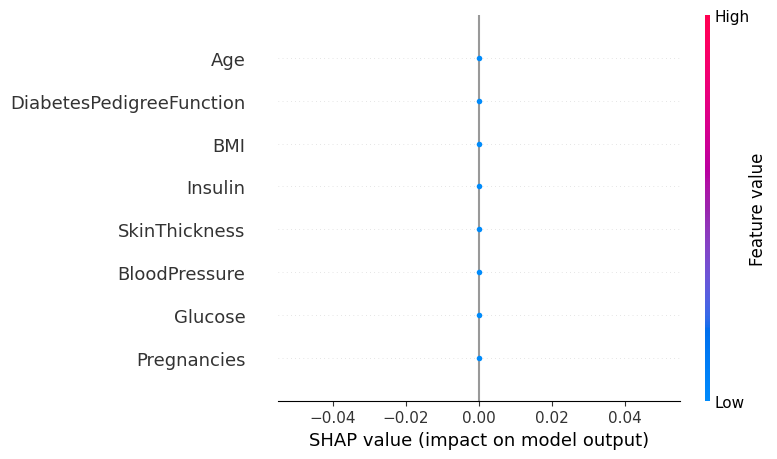

In [ ]:
import shap
import matplotlib.pyplot as plt

explainer = shap.Explainer(loaded_model, np.array(input_data_reshaped))
shap_values = explainer(input_data_reshaped)
print(shap_values)
shap.summary_plot(shap_values, input_data_reshaped, feature_names=X.columns, show=False)


In [ ]:
input_data2 = (8,183,64,3,4,23.3,0.672,32)

# changing the input_data to numpy array
input_data_as_numpy_array2 = np.asarray(input_data2)

# reshape the array as we are predicting for one instance
input_data_reshaped2 = input_data_as_numpy_array2.reshape(1,-1)

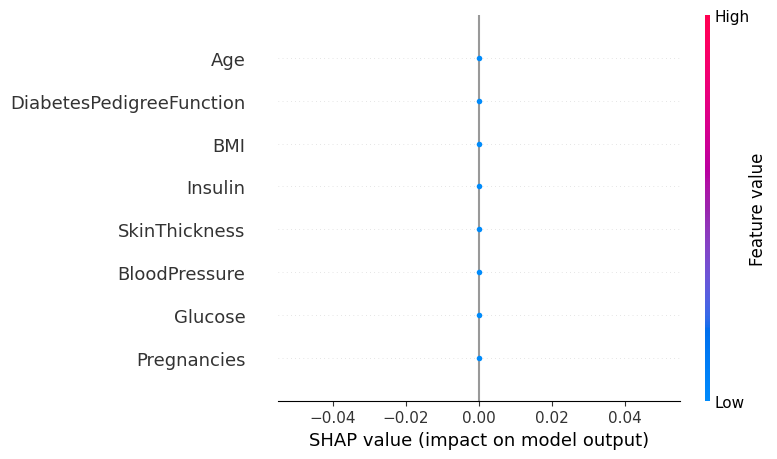

In [ ]:
explainer = shap.Explainer(loaded_model, np.array(input_data_reshaped2))
shap_values = explainer(input_data_reshaped2)
shap.summary_plot(shap_values, input_data_reshaped2, feature_names=X.columns, show=False)

In [ ]:
# Accessing the coefficients instead of feature_importances_
print(loaded_model.coef_)

[[ 8.71165235e-02  3.20641093e-02 -1.15191294e-02  2.34385746e-04
  -1.57989391e-03  7.90333569e-02  7.29004207e-01  6.81620935e-03]]


In [ ]:
import numpy as np

# Get feature importance (absolute coefficients)
diabetes_importance = np.abs(loaded_model.coef_)[0]  # Get absolute values
import numpy as np

# Get feature importance (absolute coefficients)
diabetes_importance = np.abs(loaded_model.coef_)[0]  # Get absolute values
diabetes_importance
# Normalize so they sum to 1
diabetes_importance /= diabetes_importance.sum()

print("Diabetes Feature Importance:", diabetes_importance)


Diabetes Feature Importance: [9.19563892e-02 3.38454704e-02 1.21590889e-02 2.47407335e-04
 1.66766686e-03 8.34241523e-02 7.69504933e-01 7.19489226e-03]


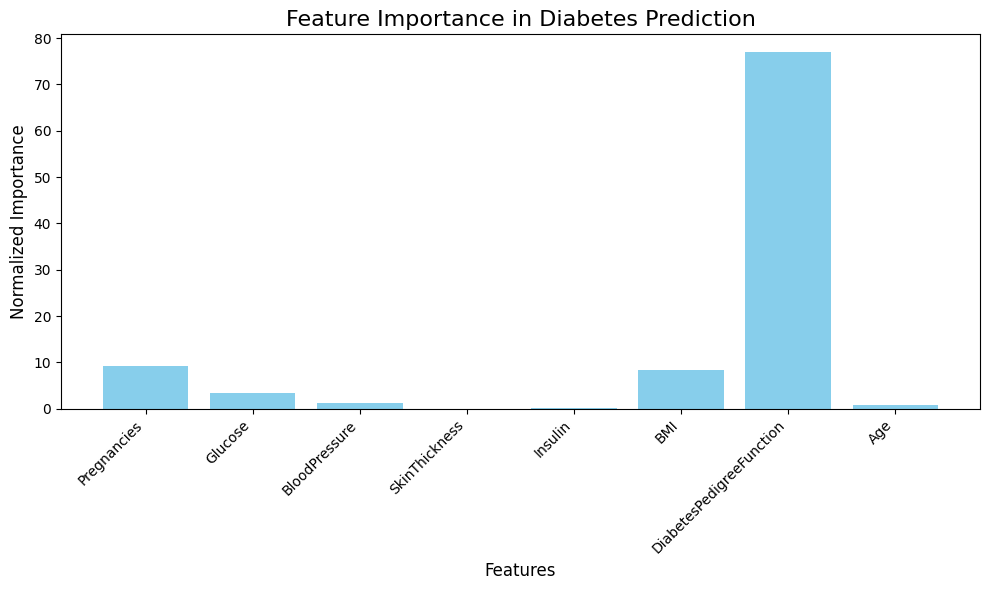

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already calculated 'diabetes_importance' as described before

# Get feature names (column names from your dataset)
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(feature_names, diabetes_importance*100, color='skyblue')
plt.title('Feature Importance in Diabetes Prediction', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Normalized Importance', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()